# Analysis of Tesla's Financial Statements 2018-2020

Helen Nguyen (Trang Ha Nguyen)

Pomonna College Class of 2024

**Source**: Analysis is based on annual disclosure on [Tesla's Investor Relations page](https://ir.tesla.com/#tab-quarterly-disclosure). Figures are extracted from 10-K over the years.

**Note**: Time period 2018-2020 is based on years with figures in the same monetary units (in millions).

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# in millions, except per share data

bs_df = pd.DataFrame(np.array([[2018,
                            3686, 949, 3113, 8307, 29740, 
                            3405, 9993, 23427, 
                            4923],
                                
                            [2019,
                            6268, 1324, 3552, 12103, 34309, 
                            3771, 10667, 26199, 
                            6618],
                              
                            [2020,
                            19384, 1886, 4101, 26717, 52148, 
                            6051, 14248, 28418, 
                            22225]]),
                      
                      columns=['Year',
                            'Cash and cash equivalents', 'Accounts receivable', 'Inventory', 'Total current assets', 'Total assets', 
                            'Accounts payable', 'Total current liabilities', 'Total liabilities', 
                            'Total stockholder\'s equity'])

bs_df


,Year,Cash and cash equivalents,Accounts receivable,Inventory,Total current assets,Total assets,Accounts payable,Total current liabilities,Total liabilities,Total stockholder's equity
0,2018,3686,949,3113,8307,29740,3405,9993,23427,4923
1,2019,6268,1324,3552,12103,34309,3771,10667,26199,6618
2,2020,19384,1886,4101,26717,52148,6051,14248,28418,22225


In [10]:
# in millions, except per share data

is_df = pd.DataFrame(np.array([
                            [2018,
                            18515, 1555, 21461,
                            17419, 4042,
                            1460, 4430, -1063],
    
                            [2019,
                            20821, 1531, 24578,
                            20509, 4069,
                            1343, 4138, -775],
    
                            [2020,
                            27236, 1994, 31536,
                            24906, 6630,
                            1491, 4636, 862]]),
                     
                   columns=['Year',
                            'Total automotive revenue', 'Energy generation and storage', 'Total revenues',
                            'Total cost of revenues', 'Gross profit',
                            'R&D', 'Total operating expenses', 'Net income'])
is_df

,Year,Total automotive revenue,Energy generation and storage,Total revenues,Total cost of revenues,Gross profit,R&D,Total operating expenses,Net income
0,2018,18515,1555,21461,17419,4042,1460,4430,-1063
1,2019,20821,1531,24578,20509,4069,1343,4138,-775
2,2020,27236,1994,31536,24906,6630,1491,4636,862


In [11]:
# in millions

cf_df = pd.DataFrame(np.array([
                              [2018,
                            2098,
                            -2337,
                            574,
                            3965,
                            4277],
                               
                               [2019,
                            2405,
                            -1436,
                            1529,
                            4277,
                            6783],
                               
                               [2020,
                            5943,
                            -3132,
                            9973,
                            6783,
                            19901]]),
                                
                        columns=['Year',
                            'Net cash provided by/used in operating activities',
                            'Net cash provided by/used in investing activities',
                            'Net cash provided by/used in financing activities',
                            'Cash and cash equivalents at beginning of period',
                            'Cash and cash equivalents at end of period'])
cf_df

,Year,Net cash provided by/used in operating activities,Net cash provided by/used in investing activities,Net cash provided by/used in financing activities,Cash and cash equivalents at beginning of period,Cash and cash equivalents at end of period
0,2018,2098,-2337,574,3965,4277
1,2019,2405,-1436,1529,4277,6783
2,2020,5943,-3132,9973,6783,19901


## Mini Profitabilty Analysis

Due to limited data

In [13]:
profit_df = pd.DataFrame(columns = ['Year', 'Gross Profit Percentage (%)', 'Return on Sales (%)'])

# year
profit_df['Year'] = cf_df['Year'].values

# gross profit percentage (gpp)
profit_df['Gross Profit Percentage (%)'] = is_df['Gross profit'] / is_df['Total revenues']

# return on sales (ros)
profit_df['Return on Sales (%)'] = is_df['Net income'] / is_df['Total revenues']

profit_df

,Year,Gross Profit Percentage (%),Return on Sales (%)
0,2018,0.188342,-0.049532
1,2019,0.165555,-0.031532
2,2020,0.210236,0.027334


## Mini Short-term Analysis

Due to limit of data

In [16]:
liquidity_df = pd.DataFrame(columns = ['Year', 'Working Capital ($)', 'Current Ratio'])

# year
liquidity_df['Year'] = cf_df['Year'].values

# working capital (wc)
liquidity_df['Working Capital ($)'] = bs_df['Total current assets'] - bs_df['Total current liabilities']

# current ratio (cr)
liquidity_df['Current Ratio'] = bs_df['Total current assets'] / bs_df['Total current liabilities']

liquidity_df


,Year,Working Capital ($),Current Ratio
0,2018,-1686,0.831282
1,2019,1436,1.134621
2,2020,12469,1.875140


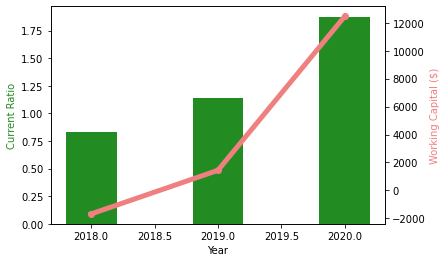

In [36]:
fig, ax = plt.subplots()
ax.bar(liquidity_df['Year'], liquidity_df['Current Ratio'], width=0.4, color='forestgreen')
ax.set_xlabel('Year')
ax.set_ylabel('Current Ratio',color='forestgreen')

ax2=ax.twinx()
ax2.plot(liquidity_df['Year'], liquidity_df['Working Capital ($)'], linewidth=5, color='lightcoral', marker='o')
ax2.set_ylabel('Working Capital ($)', color='lightcoral')
plt.show()